# Example notebook for using Cantor data and off-centre FOF haloes

In a nutshell: Cantor is a re-processing of the Subfind subhalo catalogue, to more accurately assign particles to subhaloes. It is based on the same FOF groups as the Subfind catalogue.

## Using the Cantor data

The Cantor data are stored in the `.../highlev/` director of each (hydro) simulation, in a subdirectory called `Cantor`.

`bahe@watering:/net/quasar/data3/Hydrangea/CE-0/HYDRO/highlev/Cantor>ls
Cantor_000.hdf5  Cantor_008.hdf5  Cantor_016.hdf5  Cantor_024.hdf5
Cantor_001.hdf5  Cantor_009.hdf5  Cantor_017.hdf5  Cantor_025.hdf5
Cantor_002.hdf5  Cantor_010.hdf5  Cantor_018.hdf5  Cantor_026.hdf5
Cantor_003.hdf5  Cantor_011.hdf5  Cantor_019.hdf5  Cantor_027.hdf5
Cantor_004.hdf5  Cantor_012.hdf5  Cantor_020.hdf5  Cantor_028.hdf5
Cantor_005.hdf5  Cantor_013.hdf5  Cantor_021.hdf5  Cantor_029.hdf5
Cantor_006.hdf5  Cantor_014.hdf5  Cantor_022.hdf5  Cantor_029_IDs.hdf5
Cantor_007.hdf5  Cantor_015.hdf5  Cantor_023.hdf5  GalaxyTables.hdf5`

There are three kinds of HDF5 files: (i) the actual catalogues with properties of subhaloes (`Cantor_0xx.hdf5`); (ii) a separate file for each catalogue the contains the IDs of each particle within subhaloes (`Cantor_0xx_IDs.hdf5`, currently only copied to Leiden for snapshot 29 because these are quite big); (iii) a file `GalaxyTables.hdf5` that connects each galaxy ID to its Cantor subhalo index in each snapshot.

### Cantor files in more detail

#### Galaxy connection tables (GalaxyTables.hdf5)

This is the simplest file, and there is only one per simulation. It gives the Cantor subhalo index for every galaxy in each snapshot, analogous to the `SHI` data set in `FullGalaxyTables.hdf5`. In addition, there is a data set pointing to the Cantor definition, which is not guaranteed to be the same as the central assigned by Subfind (Cantor uses a regularization procedure to avoid central/satellite swaps):

`bahe@watering:/net/quasar/data3/Hydrangea/CE-0/HYDRO/highlev/Cantor>h5ls GalaxyTables.hdf5 
CentralGalaxy            Dataset {389777, 30}
Header                   Group
SubhaloIndex             Dataset {389777, 30}`

#### Cantor catalogue files (Cantor_0xx.hdf5)

Each Cantor catalogue file contains two base groups (and a Header group with mostly technical info): `FOF` and `Subhalo`: 

`bahe@watering:/net/quasar/data3/Hydrangea/CE-0/HYDRO/highlev/Cantor>h5ls Cantor_029.hdf5
FOF                      Group
Header                   Group
Subhalo                  Group`

`FOF` does not hold much info, because the FOF properties are the same as in the Subfind catalogues. So the only info here is on the (Cantor) subhaloes within each FOF:

`bahe@watering:/net/quasar/data3/Hydrangea/CE-0/HYDRO/highlev/Cantor>h5ls Cantor_029.hdf5/FOF
CenSubhalo               Dataset {104067} --> pointer to central subhalo in each FOF (see below)
FirstSubhalo             Dataset {104068} --> pointer to first subhalo in each FOF (see below)
Length                   Dataset {104067} --> number of particles in ID list for each FOF group
NumOfSubhaloes           Dataset {104067} --> number of subhaloes in each FOF group
Offset                   Dataset {104068} --> offset of particles in ID list for each FOF group` 

Note that `CenSubhalo` and `FirstSubhalo` are often identical; they only differ where a FOF has not a single subhalo (`NumOfSubhaloes == 0`). In those cases, `CenSubhalo = -1`, whereas `FirstSubhalo` points to the central subhalo in the *next* FOF that has any (this sounds silly at first, but is useful in certain situations because it makes the list monotonic).

`Subhalo` is (much) more interesting. It contains (a currently limited set of) properties of individual Cantor subhaloes. For most of these, it should be relatively clear from the name what they mean, there is also a more detailed description in the `Comment` attribute of each.

`bahe@watering:/net/quasar/data3/Hydrangea/CE-0/HYDRO/highlev/Cantor>h5ls Cantor_029.hdf5/Subhalo
AngularMomentum_DM       Dataset {121058, 3}
AngularMomentum_Gas      Dataset {121058, 3}
AngularMomentum_Stars    Dataset {121058, 3}
CentreOfMass             Dataset {121058, 3}
CentreOfPotential        Dataset {121058, 3}
Extra                    Group
FOF_Index                Dataset {121058}
Galaxy                   Dataset {121058}
IndexBySubfindID         Dataset {114234}
Length                   Dataset {121058}
LengthType               Dataset {121058, 6}
Mass                     Dataset {121058}
MassType                 Dataset {121058, 6}
MaxRadius                Dataset {121058}
MaxRadiusType            Dataset {121058, 6}
Offset                   Dataset {121058}
OffsetType               Dataset {121058, 7}
Position                 Dataset {121058, 3}
RadiusOfVmax             Dataset {121058}
SubfindIndex             Dataset {121058}
Velocity                 Dataset {121058, 3}
VelocityDispersion_DM    Dataset {121058}
VelocityDispersion_Stars Dataset {121058}
Vmax                     Dataset {121058}
ZMF_Velocity             Dataset {121058, 3}`

Example for more detailed description (in this case for the `LengthType` data set):

`bahe@watering:/net/quasar/data3/Hydrangea/CE-0/HYDRO/highlev/Cantor>h5dump -A -d Subhalo/LengthType Cantor_029.hdf5
HDF5 "Cantor_029.hdf5" {
DATASET "Subhalo/LengthType" {
   DATATYPE  H5T_STD_I32LE
   DATASPACE  SIMPLE { ( 121058, 6 ) / ( 121058, 6 ) }
   ATTRIBUTE "Comment" {
      DATATYPE  H5T_STRING {
         STRSIZE 164;
         STRPAD H5T_STR_NULLPAD;
         CSET H5T_CSET_ASCII;
         CTYPE H5T_C_S1;
      }
      DATASPACE  SCALAR
      DATA {
      (0): "Number of particles in ID list that belong to subhalo i (first index) and have type j (second index). These particles are stored at indices [offset_i]:[offset_i+1]."
      }
   }
}
}`

Maybe worth highlighting particularly is the `IndexBySubfindID` data set: that one contains the Cantor subhalo index for a given *Subfind* subhalo index in the same snapshot (-1 if that subfind subhalo was not found by Cantor):

In [2]:
import hydrangea as hy
import numpy as np

/software/rhel7/lib64/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [16]:
sim = hy.Simulation(0)   # Set up simulation object for CE-0, as an example
cantor_cat = f'{sim.high_level_dir}Cantor/Cantor_029.hdf5'
print(cantor_cat)

/net/quasar/data3/Hydrangea/10r200/CE-0/HYDRO/highlev/Cantor/Cantor_029.hdf5


In [14]:
cantor_for_subfind = hy.hdf5.read_data(cantor_cat, 'Subhalo/IndexBySubfindID')
print(cantor_for_subfind[:20])

[ 0  1  2  3  4  5  6  7  8 10  9 12 13 11 17 14 18 32 19 16]


So here, for example, Subfind subhalo 9 corresponds to Cantor subhalo 10 (and, by coincidence, vice versa). We can directly compare e.g. the coordinates and stellar mass of this object in both catalogues:

In [63]:
subfind_file = sim.get_subfind_file(29)
sub = hy.SplitFile(subfind_file, 'Subhalo', read_index=9, verbose=0)
print("Coordinates in Subfind are", sub.CentreOfPotential)
centre = hy.hdf5.read_data(cantor_cat, 'Subhalo/CentreOfPotential', read_index=10)
print("Coordinates in Cantor are", centre)
print("")
print(f"Stellar mass in Subfind is {sub.MassType[4]/1e11:.4f} x 10^11 M_Sun.")
print(f"Stellar mass in Cantor is "
      f"{hy.hdf5.read_data(cantor_cat, 'Subhalo/MassType', read_index=10)[4]/10:.4f} x 10^11 M_Sun.")
      
## Careful: masses in the Cantor catalogue are in 10^10 M_Sun, but those extracted from the Subfind catalogue
##          with the SplitFile class are in M_Sun...

Coordinates in Subfind are [1608.3173 1602.9695 1607.5225]
Coordinates in Cantor are [1608.31688088 1602.96922824 1607.52246131]

Stellar mass in Subfind is 1.1915 x 10^11 M_Sun.
Stellar mass in Cantor is 1.2450 x 10^11 M_Sun.


Result: the coordinates are almost exactly identical (the tiny difference comes from identifying a slightly different particle as the potential minimum), but the stellar masses are not quite the same. Cantor finds a bit of a higher stellar mass, because this one is a satellite (the central cluster, `FOF == 0` is bound to have at least 10 subhaloes!), and Cantor tends to attach more stars to a subhalo than Subfind.

Also note that the Cantor coordinates are stored at a higher precision, which is important since the Subfind (float) precision only allows ~kpc accuracy.

Also worth pointing out: the `Galaxy` data set points to the galaxy ID of each Cantor subhalo. This is the same galaxy ID as in the `FullGalaxyTables.hdf5` catalogues (since Cantor is built on top of these galaxy tracing results). Let's test this explicitly:

In [33]:
galaxy = hy.hdf5.read_data(cantor_cat, 'Subhalo/Galaxy', read_index=10)
print(f"Galaxy ID of Cantor subhalo 10 is {galaxy}.")
      
# Find the Subfind subhalo of this one from the FullGalaxyTables file
subfind_from_galaxy = hy.hdf5.read_data(sim.fgt_loc, 'SHI', read_index=galaxy)[29]  # Look up subhalo in snap 29
print(f"Subfind subhalo of galaxy {galaxy} in snapshot 29 is {subfind_from_galaxy}.")

Galaxy ID of Cantor subhalo 10 is 767.
Subfind subhalo of galaxy 767 in snapshot 29 is 9.


Finally, the `Extra` group (within `Subhalo`) contains some more detailed subhalo properties that are only calculated for reasonably massive subhaloes. There are two datasets within `Extra` to find those subhaloes: (i) `ExtraIDs` gives the index *in the reduced "extra properties" catalogue* for each (Cantor) subhalo; for all subhaloes that are not massive enough, this is `-1`. (ii) `SubhaloIndex` gives the reverse: the index *in the full (Cantor) subhalo catalogue* for each entry in the extra catalogue.

As an example, again with our subhalo 10 from above:

In [35]:
extraID = hy.hdf5.read_data(cantor_cat, 'Subhalo/Extra/ExtraIDs', read_index=10)
print(f"Subhalo 10 has extra-ID {extraID}.")

Subhalo 10 has extra-ID 10.


So in this case, because the top 10 subhaloes are all massive enough to be in the extra catalogue, the two indices are the same.

#### Linking to particles (Cantor_0xx_IDs.hdf5)

To find all particles that Cantor identifies as belonging to a particular subhalo, you can use the `Cantor_0xx_IDs.hdf5` files (e.g. `Cantor_029_IDs.hdf5` for z = 0). This contains one single data set `IDs`:

`bahe@watering:/net/quasar/data3/Hydrangea/CE-0/HYDRO/highlev/Cantor>h5ls Cantor_029_IDs.hdf5
IDs                      Dataset {109134215}`

This works very similar to Subfind. `IDs` contains the particle IDs of each Cantor subhalo, in order of both FOF groups and Cantor subhaloes (this works because subhaloes are labelled sequentially within each FOF group). In addition, within each subhalo, IDs are sorted by particle type, and within particle type by radial distance from the subhalo centre.

The information about where in this long list the IDs for a particular subhalo are sitting is specified in the `Offset...` and `Length...` data sets in the main Cantor catalogue file (`Cantor_0xx.hdf5`, as described above). There are three of these; see below for examples:

(i) `Offset`: index (in the `IDs` data set) of the *first* particle belonging to each subhalo;
    `Length`: total number of particles belonging to this subhalo. 
    
(ii) `OffsetType` (and `LengthType`): the same, but with a second dimension for each particle type, so it specifies the block of e.g. gas particles of a given subhalo.

(iii) `Extra/OffsetTypeApertures`: the same, but with a *third* dimension for different radial apertures. So this can be used to directly find particles of a given type that lie within a certain radius from the subhalo centre (3, 10, 30, and 100 pkpc).

##### Example 1: whole subhalo

Let's retrieve a list with the IDs of all particles belonging to our Cantor subhalo 10 from above:

In [44]:
offset = hy.hdf5.read_data(cantor_cat, "Subhalo/Offset", read_index=10)
length = hy.hdf5.read_data(cantor_cat, "Subhalo/Length", read_index=10)

# Find the first particle *after* the block belonging to our subhalo
# Note that we cannot (reliably) use the offset of the next subhalo (11 here), because 
# at the end of the particle block for each FOF group there are "loose" particles that
# do not belong to any subhalo.
end = offset + length

cantor_ids = f'{sim.high_level_dir}Cantor/Cantor_029_IDs.hdf5'
ids = hy.hdf5.read_data(cantor_ids, 'IDs', read_range=[offset, end])
print(f"Retrieved {ids.shape[0]} IDs.")
print("First 10 IDs are:", ids[:10])

Retrieved 127373 IDs.
First 10 IDs are: [ 90454593 166190593 166177729 335199581 204404587 240929347 136430095
 310787423 282912803 324814189]


##### Example 2: only star particles

In example 1, we got *all* particles. Let's do this a bit more finely now, only retrieving stars:

In [45]:
offset = hy.hdf5.read_data(cantor_cat, "Subhalo/OffsetType", read_index=10)[4]
end = hy.hdf5.read_data(cantor_cat, "Subhalo/OffsetType", read_index=10)[5]

# Note: in this case we *can* directly look up the offset of the next particle type as `end`,
#       because these are subdivisions of individual subhaloes; there is an extra "coda"
#       entry in index 6 of the 2nd dimension so this also works for BHs (type 5).

ids_stars = hy.hdf5.read_data(cantor_ids, 'IDs', read_range=[offset, end])
print(f"Retrieved {ids_stars.shape[0]} IDs.")
print("First 10 IDs are:", ids_stars[:10])

Retrieved 84120 IDs.
First 10 IDs are: [348327033 151511633  50898603  24679775 209739697 348974305 271038371
 275338903  44062981 255913957]


This list is different from above, because the full ID list starts with the gas particles (type 0). We can verify that these are indeed in the full list though:

In [47]:
for id in ids_stars[:10]:
    print(id in ids)

True
True
True
True
True
True
True
True
True
True


To test that the result is sensible, plot a histogram of star particle radii:

Furthest star in subhalo 10 is at r = 0.767 Mpc
Checking 8 cells...
Region setup took 0.010 sec.
Selection region contains 8 cells, 11 segments, 1779637 particles, 4 files
Reading 'ParticleIDs' took 0.148 sec.
Located 84120 out of 84120 particles in snapshot region.
Reading 'Coordinates' took 0.233 sec.
Prepared reading from 'IDS'...
Loaded file offsets in 0.159 sec.
46 


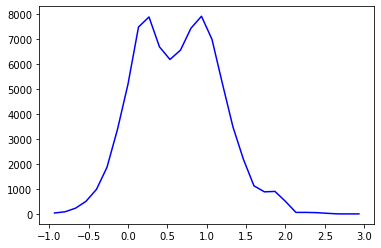

In [81]:
# Find radius of furthest-out star
max_rad = hy.hdf5.read_data(cantor_cat, 'Subhalo/MaxRadiusType', read_index=10)[4]
print(f"Furthest star in subhalo 10 is at r = {max_rad:.3f} Mpc")

# Load all star particles within that aperture
snap_file = sim.get_snapshot_file(29)   # Automatically construct the (first) snapshot file name
stars = hy.ReadRegion(snap_file, 4, centre, max_rad)

# Within this snapshot region, find stars that are in the subhalo
ind_in_snap, in_snap = hy.crossref.find_id_indices(ids_stars, stars.ParticleIDs)

# Verify that we found all of them
print(f"Located {len(in_snap)} out of {len(ids_stars)} particles in snapshot region.")

# Make a radial histogram
radii = np.linalg.norm(stars.Coordinates[ind_in_snap, :] - centre[None, :], axis=1) * 1e3   # Convert radii to kpc
hist, edges = np.histogram(np.log10(radii), bins=30, range=[-1, 3])
midpoints = 0.5 * (edges[1:] + edges[:-1])

# Make the plot
import matplotlib.pyplot as plt
ax = plt.gca()
ax.plot(midpoints, hist, color='blue')

# For reference, add stars as identified by Subfind
subfind_ids_obj = hy.SplitFile(subfind_file, 'IDs', read_range=[sub.SubOffset, sub.SubOffset+sub.SubLength])
ind_subfind_in_snap, subfind_in_snap = hy.crossref.find_id_indices(ids_stars, subfind_ids_obj.ParticleID)

In [69]:
subfind_ids.ParticleID.shape

(107291,)

In [65]:
sub.SubOffset

25692345

Prepared reading from 'IDS'...
Loaded file offsets in 0.168 sec.
46 


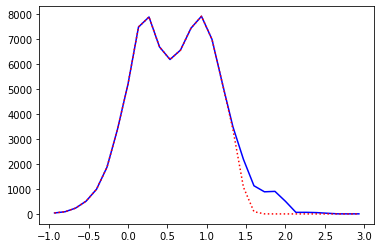

In [80]:
# For reference, add stars as identified by Subfind
subfind_ids_obj = hy.SplitFile(subfind_file, 'IDs', read_range=[sub.SubOffset, sub.SubOffset+sub.SubLength])
ind_subfind_in_snap, subfind_in_snap = hy.crossref.find_id_indices(subfind_ids_obj.ParticleID, stars.ParticleIDs)

# With Subfind, we cannot pick out the star IDs separately, so some of these will not have been
# matched (all those that are not stars). We therefore need to extract specifically those that have
# been matched, with the second `subfind_in_snap` index.
radii_subfind = np.linalg.norm(stars.Coordinates[ind_subfind_in_snap[subfind_in_snap], :]
                               - centre[None, :], axis=1) * 1e3   # Convert radii to kpc
hist_subfind, edges = np.histogram(np.log10(radii_subfind), bins=30, range=[-1, 3])
ax = plt.gca()
ax.plot(midpoints, hist, color='blue')
ax.plot(midpoints, hist_subfind, color='red', linestyle=':')

That looks good! In the centre, Subfind and Cantor give near-identical profiles. The difference is that Cantor (blue) has a more extended tail outside ~20 kpc, as expected.

##### Example 3: Select only star particles within 30 pkpc

The start point is the same as in example 2 (the innermost star particle), but we now retrieve the end point from the `OffsetTypeAperture` list in `Extra`:

In [83]:
offset = hy.hdf5.read_data(cantor_cat, "Subhalo/OffsetType", read_index=10)[4]  # As before
end = hy.hdf5.read_data(cantor_cat, "Subhalo/Extra/OffsetTypeApertures", read_index=extraID)[4, 2]

# Note: we again select the "end" index directly from the `OffsetTypeApertures` list.
# 30 pkpc corresponds to index 2 in the third dimension (see above). As always, we truncate
# the first dimension by loading only the entry for "our" subhalo with `read_index`.

ids_stars_30kpc = hy.hdf5.read_data(cantor_ids, 'IDs', read_range=[offset, end])
print(f"Retrieved {ids_stars_30kpc.shape[0]} IDs.")
print("First 10 IDs are:", ids_stars_30kpc[:10])

Retrieved 79780 IDs.
First 10 IDs are: [348327033 151511633  50898603  24679775 209739697 348974305 271038371
 275338903  44062981 255913957]


As expected, we got (slightly) fewer IDs this time, and the first 10 IDs are the same as before (since these are the ten most central star particles). Let's again compare histograms:

Located 79780 out of 79780 particles within 30 kpc in snapshot region.


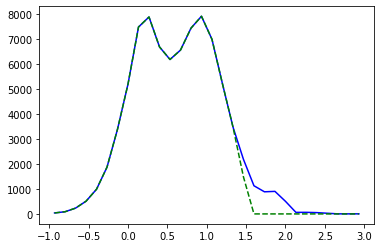

In [84]:
# Within snapshot region, find stars within 30 kpc:
ind_in_snap_30kpc, in_snap_30kpc = hy.crossref.find_id_indices(ids_stars_30kpc, stars.ParticleIDs)

# Verify that we found all of them
print(f"Located {len(in_snap_30kpc)} out of {len(ids_stars_30kpc)} particles within 30 kpc in snapshot region.")

# Make a radial histogram
radii_30kpc = np.linalg.norm(stars.Coordinates[ind_in_snap_30kpc, :] - centre[None, :], axis=1) * 1e3   # Convert radii to kpc
hist_30kpc, edges = np.histogram(np.log10(radii_30kpc), bins=30, range=[-1, 3])

ax = plt.gca()
ax.plot(midpoints, hist, color='blue')
ax.plot(midpoints, hist_30kpc, color='green', linestyle='--')

As expected, we now (green) get zero stars beyond 30 kpc (the truncation does not coincide with a histogram bin edge, so it appears smooth here...).

Note that another approach to get the same result here would have been to only load a snapshot region extending to 30 kpc from the centre, i.e. with

In [85]:
stars_30kpc = hy.ReadRegion(snap_file, 4, centre, 0.03, exact=True)

Checking 1 cells...
Reading 'Coordinates' took 0.112 sec.
Region setup took 0.210 sec.
Selection region contains 1 cells, 3 segments, 859127 particles, 3 files
Exact selection region contains 80110 particles.


## Off-centre FOF haloes

Working with FOF haloes that are not the central cluster is quite straightforward in principle -- just remove the condition of targeting (satellites in) the first, or most massive, FOF group:

In [95]:
# Read M200, Mstar, and central galaxy ID for all galaxies in snapshot 29
m200_snap29 = hy.hdf5.read_data(sim.fgt_loc, 'M200', read_index=29, index_dim=1)
central_galaxy_snap29 = hy.hdf5.read_data(sim.fgt_loc, 'CenGal', read_index=29, index_dim=1)
mstar_snap29 = hy.hdf5.read_data(sim.fgt_loc, 'Mstar', read_index=29, index_dim=1)
ngal = len(m200_snap29)

In [101]:
ind_satellites = np.nonzero((mstar_snap29 > 9.0) & (central_galaxy_snap29 != np.arange(ngal)) &
                            (m200_snap29 > 13.0))[0]
ind_central_satellites = np.nonzero((mstar_snap29 > 9.0) & (central_galaxy_snap29 == 760) &
                                    (central_galaxy_snap29 != np.arange(ngal)))[0]

In [102]:
print(f"Found {len(ind_satellites)} satellites above 10^9 M_Sun in total, "
      f"{len(ind_central_satellites)} in central cluster.")

Found 193 satellites above 10^9 M_Sun in total, 69 in central cluster.


However, there is a caveat! Not all these outer groups and their satellites are necessarily (well) within the resolved region of the simulation. To filter out bad ones, look at the `ContFlag` data set. This is 0 for any galaxy >= 8 cMpc from the nearest boundary particle, 1 (2, 3) for >= 5 (2, 1) Mpc distance, and 4 if it is < 1 cMpc away.

In [104]:
contflag_snap29 = hy.hdf5.read_data(sim.fgt_loc, 'ContFlag', read_index=29, index_dim=1)
contflag_all_sats = contflag_snap29[ind_satellites]
print(f"Out of {len(ind_satellites)} satellites, {np.count_nonzero(contflag_all_sats <= 1)} are far from the boundary.")
print(f"{np.count_nonzero((contflag_all_sats > 1) & (contflag_all_sats < 4))} are dubious.")
print(f"{np.count_nonzero((contflag_all_sats >= 4))} are very close to the boundary.")

Out of 193 satellites, 125 are far from the boundary.
53 are dubious.
15 are very close to the boundary.


The central cluster's satellites should, by definition, all be very far from the boundary:

In [106]:
print(f"{np.count_nonzero(contflag_snap29[ind_central_satellites] > 0)} central cluster satellites are not far from the boundary.")

0 central cluster satellites are not far from the boundary.
